# Adaptation and Contraction Theory for the Synchronization

In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

from matplotlib import pyplot as plt

FitzHugh-Nagumo neural network with adaptive coupling

In [12]:
def f(t,X,N):
    u = 10
    a = 0
    b = 0
    c = 2.5
    v = X[:N]
    w = X[N:2*N]
    s = X[2*N:2*N+N*N].reshape(N,N)
    
    diff = v - np.repeat(v,N).reshape(N,N)
    Inet = (s*diff).sum(1)
    
    dv = c*(v+w-v**3/3+u) + Inet
    dw = -(v-a+b*w)/c
    ds = (diff**2).flatten()
    
    return np.hstack([dv,dw,ds])

In [13]:
N = 50
X0 = np.random.rand(2*N+N*N)
X0[2*N:] *= 0.01
sol = solve_ivp(lambda t, y: f(t, y, N), (0,1000), X0)

In [14]:
T = sol.t
X = sol.y
V = X[:N]
S = X[2*N:]

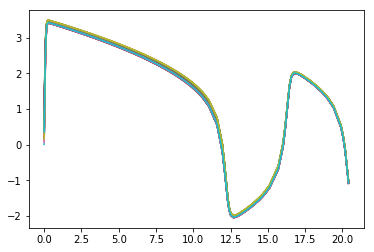

In [15]:
plt.plot(T[:100],V[:,:100].T)
plt.show()

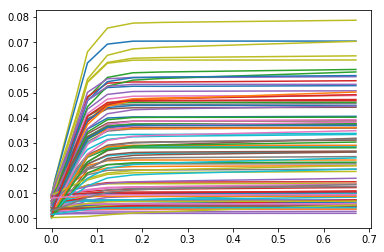

In [16]:
plt.plot(T[:10],S[:100,:10].T)
plt.show()